### Learn about database queries to access chemical information from PubChem public database

This tutorial was adapted from https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics. Specifically, it includes the end-of-chapter Python exercises from Chapter 3 and Chapter 4.

The tutorial runs in **Python 3.9.13** with **RDKit version 2022.03.5**. To install RDKit in a Conda environment use `conda install -c conda-forge rdkit`. 

In [143]:
# import necessary modules

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

import requests
import time
import io

# Chapter 3: Database Resources in Cheminformatics

## Substructure standardization

In [7]:
# get a list of SIDs that are associated CID 1174 (uracil)

cid = 1174

url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + str(cid) + "/sids/txt"

res = requests.get(url)

sids = res.text.split()

print(len(sids))

442


This shows that there are over 400 structures currently associated with uracil: Pubchem is a public database with data from many sources, so lots of duplicate structures will occur. Each of the structures is a separate **"substance"** although they are not all unique

In [3]:
# Download the structure data for the SIDs

chunk_size = 50

if len(sids) % chunk_size == 0 :

    num_chunks = int( len(sids) / chunk_size )

else :

    num_chunks = int( len(sids) / chunk_size ) + 1

f = open("cid2sids-uracil.sdf", "w")

##list conversion for computationally-efficient queries
# break request into chunks to avoid overwhelming Pubchem with too large of a request
for i in range(num_chunks):

    print("Processing chunk", i)

    idx1 = chunk_size * i

    idx2 = chunk_size * (i + 1)

    str_sids = ",".join(sids[idx1:idx2]) #list of SIDS separated by commas 

    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/" + str_sids + "/record/sdf"

    res = requests.get(url)

    f.write(res.text)

    time.sleep(0.2)

f.close()

Processing chunk 0
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8


In [5]:
# convert the structures in the SDF file into the SMILES strings and identify unique SMILES and their frequencies.

unique_smiles_freq = dict()

suppl = Chem.SDMolSupplier('cid2sids-uracil.sdf')

for mol in suppl:

    smiles = Chem.MolToSmiles(mol,isomericSmiles=True)

    unique_smiles_freq[ smiles ] = unique_smiles_freq.get(smiles,0) + 1

sorted_by_freq = [ (v, k) for k, v in unique_smiles_freq.items() ]
sorted_by_freq.sort(reverse=True)
for v, k in sorted_by_freq :
    print(v, k)

300 O=c1cc[nH]c(=O)[nH]1
94 Oc1ccnc(O)n1
27 
7 O=c1ccnc(O)[nH]1
5 O=c1nccc(O)[nH]1
5 O=c1nc(O)cc[nH]1
4 O=c1cc[nH]c(O)n1


O=c1cc[nH]c(=O)[nH]1


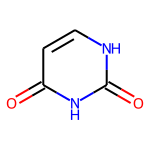

Oc1ccnc(O)n1


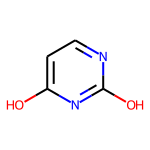

O=c1nc(O)cc[nH]1


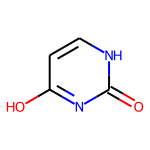

O=c1nccc(O)[nH]1


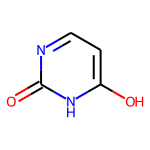

O=c1ccnc(O)[nH]1


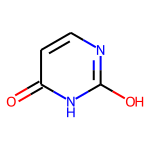

O=c1cc[nH]c(O)n1


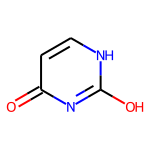

In [8]:
#  Generate the structure images from the SMILES

for mysmiles in unique_smiles_freq.keys() :

    if mysmiles != "" : #ignore entries without SMILES data
        
        print(mysmiles)
        img = Draw.MolToImage( Chem.MolFromSmiles(mysmiles), size=(150, 150) )
        display(img)

In [18]:
# generate non-canonical SMILES strings for the 360+ substance records associated with uracil (CID 1174).

unique_smiles_freq = dict()

suppl = Chem.SDMolSupplier('cid2sids-uracil.sdf')

for mol in suppl:

    smiles = Chem.MolToSmiles(mol,isomericSmiles=True, canonical=False)
    
    # Ignore/skip structure-less records 
    if smiles!="":

        unique_smiles_freq[ smiles ] = unique_smiles_freq.get(smiles,0) + 1

#Print the number of unique non-canonical SMILES
print("number of unique non-canonical SMILES:", len(unique_smiles_freq), '\n')

#Print unique non-canonical SMILES, sorted by frequency.
sorted_by_freq = [ (v, k) for k, v in unique_smiles_freq.items() ]
sorted_by_freq.sort(reverse=True)
for v, k in sorted_by_freq :
    print(v, k)

number of unique non-canonical SMILES: 27 

215 O=c1[nH]c(=O)cc[nH]1
47 Oc1nc(O)ccn1
36 Oc1nc(O)ncc1
26 c1c[nH]c(=O)[nH]c1=O
17 [nH]1c(=O)[nH]c(=O)cc1
12 O=c1[nH]ccc(=O)[nH]1
11 O=c1cc[nH]c(=O)[nH]1
9 [nH]1c(=O)[nH]ccc1=O
6 [nH]1c(=O)cc[nH]c1=O
5 Oc1[nH]c(=O)ccn1
4 O=c1[nH]c(O)ccn1
3 Oc1nccc(O)n1
3 Oc1nc(=O)cc[nH]1
2 n1c(O)nccc1O
2 n1c(O)nc(O)cc1
2 c1cnc(O)nc1O
2 c1(=O)[nH]c(=O)cc[nH]1
2 Oc1ccnc(O)n1
2 O=c1nc(O)cc[nH]1
2 O=c1[nH]ccc(O)n1
1 n1c(O)[nH]c(=O)cc1
1 c1(O)[nH]c(=O)ccn1
1 [nH]1ccc(=O)[nH]c1=O
1 [nH]1c(=O)nccc1O
1 [nH]1c(=O)nc(O)cc1
1 Oc1[nH]ccc(=O)n1
1 O=c1[nH]c(=O)[nH]cc1


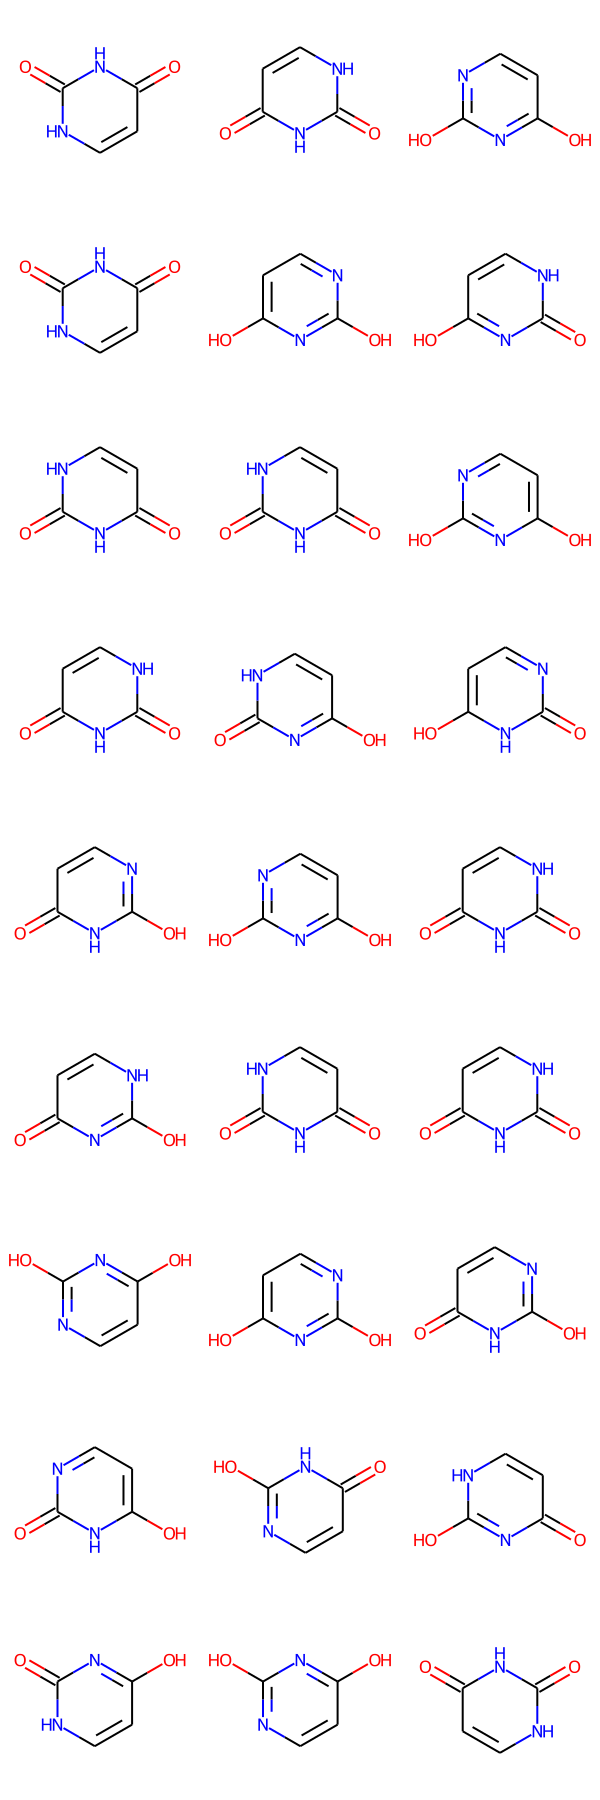

In [20]:
smileslist = []

for mysmiles in unique_smiles_freq.keys() :
    smileslist.append(Chem.MolFromSmiles(mysmiles))

Draw.MolsToGridImage(smileslist)

In [21]:
#Retrieve the substance records associated with guanine 

cid = 135398634

url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + str(cid) + "/sids/txt"

res = requests.get(url)

sids = res.text.split()

print(len(sids))

353


In [22]:
# Download the structure data for the SIDs

chunk_size = 50

if len(sids) % chunk_size == 0 :

    num_chunks = int( len(sids) / chunk_size )

else :

    num_chunks = int( len(sids) / chunk_size ) + 1

f = open("cid2sids-guanine.sdf", "w")

for i in range(num_chunks):

    print("Processing chunk", i)

    idx1 = chunk_size * i

    idx2 = chunk_size * (i + 1)

    str_sids = ",".join(sids[idx1:idx2])

    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/" + str_sids + "/record/sdf"

    res = requests.get(url)

    f.write(res.text)

    time.sleep(0.2)

f.close()

Processing chunk 0
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7


In [24]:
# convert the structures in the SDF file into the canonical SMILES strings and identify unique SMILES and their frequencies.

unique_smiles_freq = dict()

suppl = Chem.SDMolSupplier('cid2sids-guanine.sdf')

for mol in suppl:

    smiles = Chem.MolToSmiles(mol,isomericSmiles=True)
    if smiles!="":

        unique_smiles_freq[ smiles ] = unique_smiles_freq.get(smiles,0) + 1

sorted_by_freq = [ (v, k) for k, v in unique_smiles_freq.items() ]
sorted_by_freq.sort(reverse=True)
for v, k in sorted_by_freq :
    print(v, k)

149 Nc1nc2[nH]cnc2c(=O)[nH]1
59 Nc1nc2nc[nH]c2c(=O)[nH]1
49 Nc1nc(=O)c2[nH]cnc2[nH]1
21 N=c1nc(O)c2nc[nH]c2[nH]1
19 Nc1nc(O)c2nc[nH]c2n1
16 Nc1nc(O)c2[nH]cnc2n1
6 N=c1[nH]c(=O)c2nc[nH]c2[nH]1
4 Nc1nc(=O)c2nc[nH]c2[nH]1
3 N=c1[nH]c2ncnc-2c(O)[nH]1
3 N=c1[nH]c(=O)c2[nH]cnc2[nH]1
2 Nc1nc2ncnc-2c(O)[nH]1


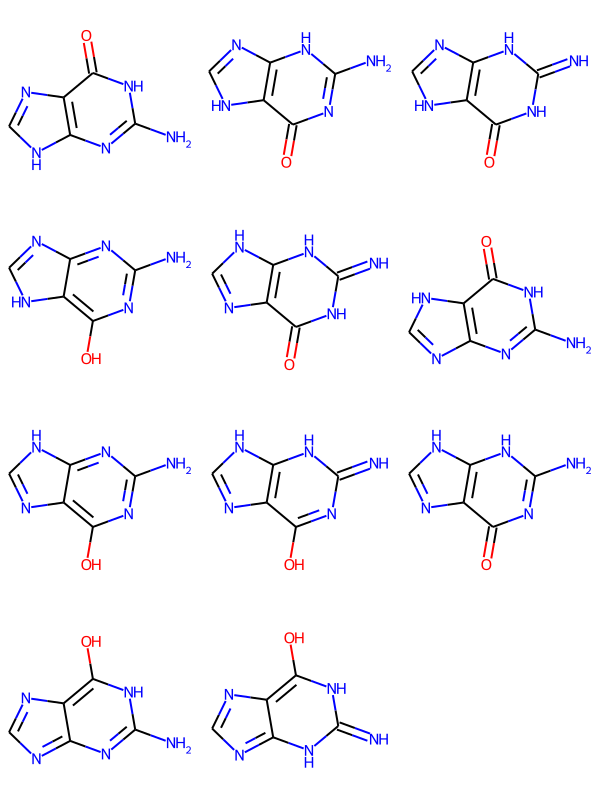

In [25]:
# Draw the structures represented by the unqiue canonical SMILES strings in a single figure.

smileslist = []

for mysmiles in unique_smiles_freq.keys() :
    
    smileslist.append(Chem.MolFromSmiles(mysmiles))

Draw.MolsToGridImage(smileslist)

In [144]:
#Retrieve the substance records with synonym "glucose"

syn = "glucose"

url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/name/" + str(syn) + "/sids/txt"

res = requests.get(url)

sids = res.text.split()

print(len(sids))

309


In [145]:
# Download the structure data for the SIDs

chunk_size = 50

if len(sids) % chunk_size == 0 :

    num_chunks = int( len(sids) / chunk_size )

else :

    num_chunks = int( len(sids) / chunk_size ) + 1

f = open("cid2sids-glucose.sdf", "w")

for i in range(num_chunks):

    print("Processing chunk", i)

    idx1 = chunk_size * i

    idx2 = chunk_size * (i + 1)

    str_sids = ",".join(sids[idx1:idx2])

    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/" + str_sids + "/record/sdf"

    res = requests.get(url)

    f.write(res.text)

    time.sleep(0.2)

f.close()

Processing chunk 0
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6


In [146]:
# convert the structures in the SDF file into the canonical SMILES strings and identify unique SMILES and their frequencies.

unique_smiles_freq = dict()

suppl = Chem.SDMolSupplier('cid2sids-glucose.sdf')

for mol in suppl:

    smiles = Chem.MolToSmiles(mol,isomericSmiles=True)
    if smiles!="":

        unique_smiles_freq[ smiles ] = unique_smiles_freq.get(smiles,0) + 1

sorted_by_freq = [ (v, k) for k, v in unique_smiles_freq.items() ]
sorted_by_freq.sort(reverse=True)
for v, k in sorted_by_freq :
    print(v, k)

251 O.OCC1OC(O)C(O)C(O)C1O
15 OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O
10 O=C[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO
9 OCC1OC(O)C(O)C(O)C1O
8 OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@@H]1O
7 O=CC(O)C(O)C(O)C(O)CO
5 OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O


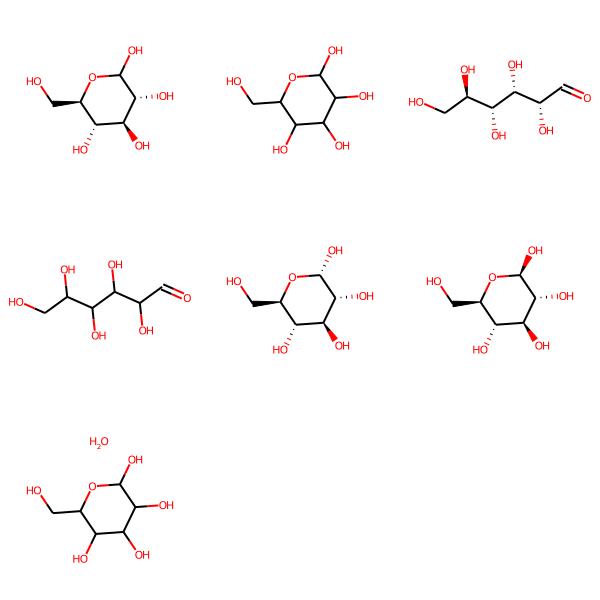

In [147]:
# Draw the structures represented by the unqiue canonical SMILES strings in a single figure.

smileslist = []

for mysmiles in unique_smiles_freq.keys() :
    
    smileslist.append(Chem.MolFromSmiles(mysmiles))

Draw.MolsToGridImage(smileslist)

In [156]:
#Retrieve the CIDs associated with the SIDs whose name is "glucose"

sidstring = ''
for sid in sids:
    sidstring+=sid
    sidstring+=','

url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/" + sidstring + "/cids/txt?list_return=grouped"
res = requests.get(url)
cids = res.text.split()

In [157]:
# Identify unique CIDs from the returned CIDs

cids = set(cids)

print(len(cids))

7


In [159]:
# Retrieve the isomeric SMILES for the unique CIDs 

cidstring = ''
for cid in cids:
    cidstring+=cid
    cidstring+=','
    
url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/" + cidstring + "/record/sdf"

res = requests.get(url)

f = open("glucose_cids.sdf", "w")

f.write(res.text)

f.close()

suppl = Chem.SDMolSupplier("glucose_cids.sdf")

for mol in suppl:

    smiles = Chem.MolToSmiles(mol,isomericSmiles=True)

    unique_smiles_freq[ smiles ] = unique_smiles_freq.get(smiles,0) + 1

sorted_by_freq = [ (v, k) for k, v in unique_smiles_freq.items() ]
sorted_by_freq.sort(reverse=True)
for v, k in sorted_by_freq :
    print(v, k)

251 O.OCC1OC(O)C(O)C(O)C1O
15 OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O
10 O=C[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO
9 OCC1OC(O)C(O)C(O)C1O
8 OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@@H]1O
7 O=CC(O)C(O)C(O)C(O)CO
5 OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O
2 
1 c1cc(Nc2ccncc2)ccn1
1 N=C(NCCOP(=O)(O)OC[C@@H](N)C(=O)O)NP(=O)(O)O
1 Clc1ccc(-c2nc3nc4ccccc4nc3n2-c2ccc(Br)cc2)cc1
1 COC(=O)[C@@H]1C2CCC(C[C@@H]1OC(=O)c1ccc([18F])cc1)N2C
1 C=C[Si]1(C=C)CCCCC1.O=C1C=CC(=O)O1


OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O


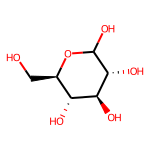

OCC1OC(O)C(O)C(O)C1O


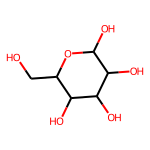

O=C[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO


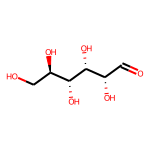

O=CC(O)C(O)C(O)C(O)CO


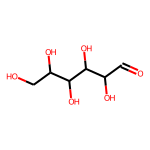

OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@@H]1O


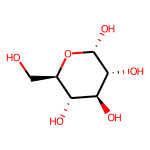

OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O


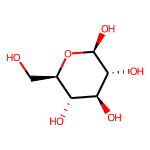

O.OCC1OC(O)C(O)C(O)C1O


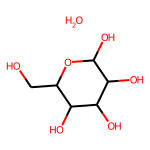

COC(=O)[C@@H]1C2CCC(C[C@@H]1OC(=O)c1ccc([18F])cc1)N2C


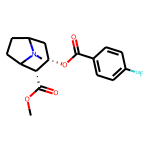

N=C(NCCOP(=O)(O)OC[C@@H](N)C(=O)O)NP(=O)(O)O


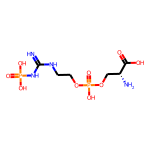

Clc1ccc(-c2nc3nc4ccccc4nc3n2-c2ccc(Br)cc2)cc1


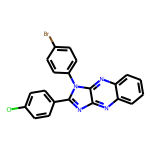

c1cc(Nc2ccncc2)ccn1


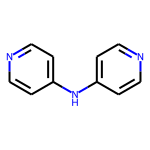

C=C[Si]1(C=C)CCCCC1.O=C1C=CC(=O)O1


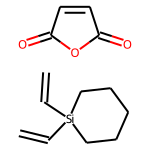

In [160]:
# Draw the structures represented by the returned SMILES strings in a single figure.

for mysmiles in unique_smiles_freq.keys() :

    if mysmiles != "" : #ignore entries without SMILES data
        
        print(mysmiles)
        img = Draw.MolToImage( Chem.MolFromSmiles(mysmiles), size=(150, 150) )
        display(img)

# Chapter 4: Searching Databases for Chemical Information

## Identity searches 

#### Identity_type: same_stereo_isotope
24726 "C(/C=C/Cl)Cl"


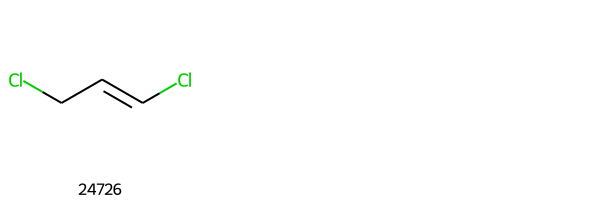

#### Identity_type: same_stereo
24726 "C(/C=C/Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"


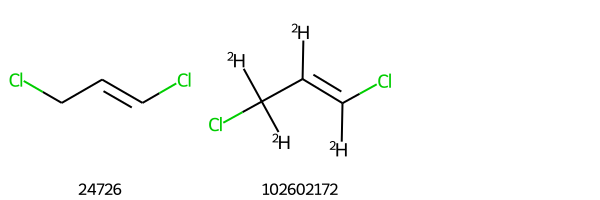

#### Identity_type: same_isotope
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"


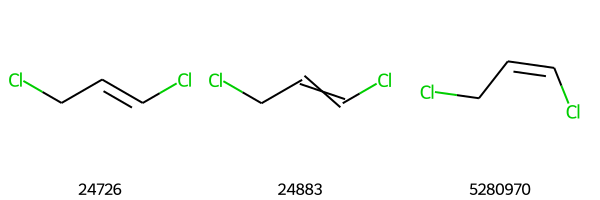

#### Identity_type: same_connectivity
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"
131875718 "[2H]C(=C([2H])Cl)C([2H])([2H])Cl"


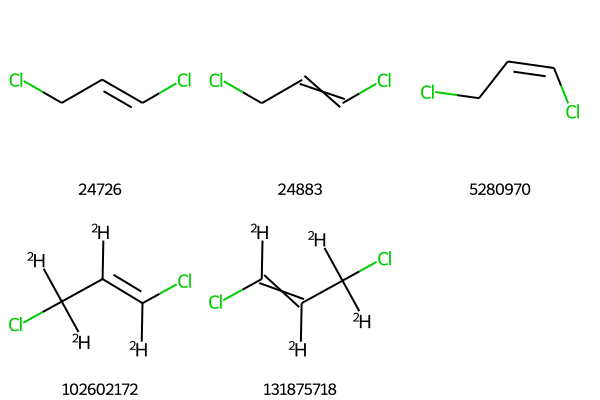

In [68]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : 'C(/C=C/Cl)Cl' }
options = [ 'same_stereo_isotope', # This is the default
            'same_stereo',
            'same_isotope',
            'same_connectivity']

for myoption in ( options ) :

    print("#### Identity_type:", myoption)
    
    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)
    
    mycids = []
    mysmiles = []
    
    file = io.StringIO(res.text)
    file.readline()               # Skip the first line (column heads)
    
    for line in file :
        
        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        mycids.append( cid_tmp )
        mysmiles.append( smiles_tmp.replace('"',"") )

    mols = []
    
    for x in mysmiles :
        
        mol = Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)    # Identify potential stereo bonds!
        mols.append(mol)
    
    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
    display(img)
            
    time.sleep(0.2)

In [174]:
#Find compounds that have the same atom connectivity and isotope information as the query molecule.

query = "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : query }
options = [ 'same_isotope',
            'same_connectivity']

for myoption in ( options ) :

    print("#### Identity_type:", myoption)
    
    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)
    
    #get synonyms
    #url2 = prolog + '/compound/fastidentity/smiles/synonyms/txt?identity_type=' + myoption   
    #res2 = requests.post(url2, data=mydata)
    
    mycids = []
    mysmiles = []
    
    file = io.StringIO(res.text)
    file.readline()               # Skip the first line (column heads)
    #file2 = io.StringIO(res2.text)
    #file2.readline()
    
    for line in file :
        
        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        mycids.append( cid_tmp )
        mysmiles.append( smiles_tmp.replace('"',"") )

#### Identity_type: same_isotope
9568614 "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
4594 "CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC"
9579578 "CC1=CN=C(C(=C1OC)C)C[S@@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
#### Identity_type: same_connectivity
9568614 "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
4594 "CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC"
9579578 "CC1=CN=C(C(=C1OC)C)C[S@@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
16111637 "[2H]C1=C(C(=C(C(=N1)C([2H])([2H])S(=O)C2=NC3=C(N2)C=C(C=C3)OC([2H])([2H])[2H])C([2H])([2H])[2H])OC([2H])([2H])[2H])C([2H])([2H])[2H]"
44200396 "[2H]C1=C(C(=C(C(=N1)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC([2H])([2H])[2H])C([2H])([2H])[2H])OC([2H])([2H])[2H])C([2H])([2H])[2H]"
45040154 "[2H]C([2H])([2H])OC1=CC2=C(C=C1)N=C(N2)S(=O)CC3=NC=C(C(=C3C)OC)C"
45359049 "[2H]C([2H])([2H])OC1=C(C(=NC=C1C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC)C"
49849808 "[2H][13C]([2H])([2H])OC1=CC2=C(C=C1)N=C(N2)S(=O)CC3=NC=C(C(=C3C)OC)C"
57826319 "[2H]C1=C(C(=C(C(=N1)C[S@](=O)C2=NC3=C(N2)C=C(C=C3

In [178]:
# retrieve synonyms for each compound returned from the search

cidstring = ''
for cid in cids:
    cidstring+=cid
    cidstring+=','

url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + cidstring + "/synonyms/txt?list_return=grouped"
res = requests.get(url)
synonyms = res.text.split()

print("Number of synonyms:", len(synonyms))

print("Number of unique synonyms:" ,len(set(synonyms)))

#print first 5 synonyms
synonyms=list(set(synonyms))
print(synonyms[0:5])

Number of synonyms: 1056
Number of unique synonyms: 728
['Traubenzucker', '95', 'stereochemistry)', 'NCGC00160621-03', '[JAN]']


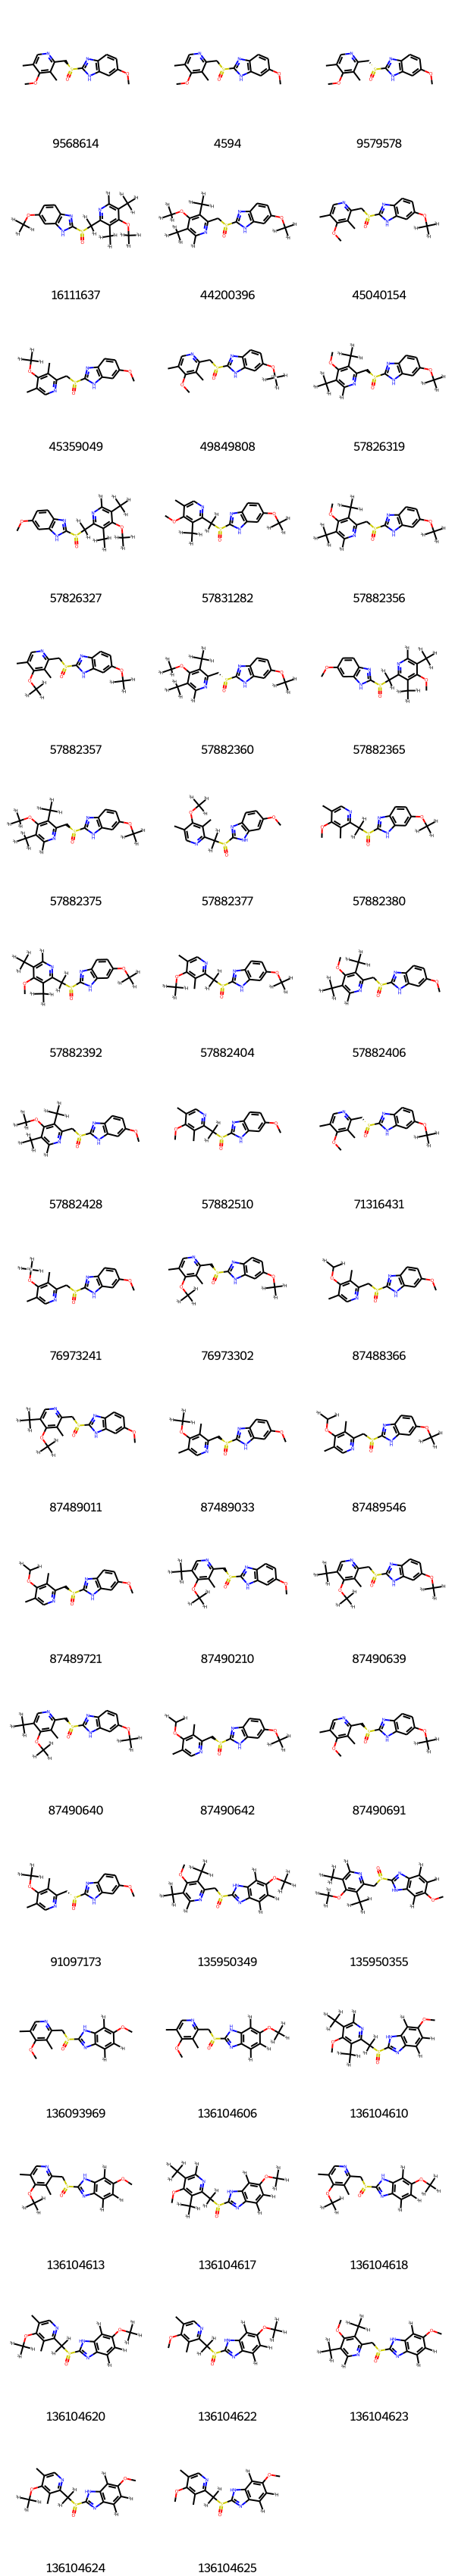

In [165]:
# retrieve structure image for each compound returned from the search

mols = []
    
for x in mysmiles :

    mol = Chem.MolFromSmiles(x)
    Chem.FindPotentialStereoBonds(mol) # Identify potential stereo bonds!
    mols.append(mol)

img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
display(img)

time.sleep(0.2)

## Similiarity searches

In [179]:
# 2D similarity search

mydata = { 'smiles' : "C1COCC(=O)N1C2=CC=C(C=C2)N3C[C@@H](OC3=O)CNC(=O)C4=CC=C(S4)Cl" }
url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99"
res = requests.post(url,data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
print(cids)

# Number of CIDs: 36
['9875401', '6433119', '11524901', '25255944', '159596345', '154630277', '145624246', '145624236', '144489887', '143433422', '123868009', '68152323', '56598114', '56589668', '25190310', '25164166', '11994745', '25190129', '25190130', '25190186', '25190187', '25190188', '25190189', '25190190', '25190248', '25190249', '25190250', '25190251', '25190252', '25190311', '25255845', '25255945', '25255946', '49849874', '133687098', '156594383']


"Threshold" is case-sensitive. If "threshold" is used (rather than "Threshold"), it will be ignored and the default value (0.90) will be used for the parameter.

In [95]:
url1 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=95"
url2 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95"  # "threshold=95" is ignored.

res1 = requests.post(url1,data=mydata)
res2 = requests.post(url2,data=mydata)
cids1 = res1.text.split()
cids2 = res2.text.split()

print("# Number of CIDs:", len(cids1), "vs.", len(cids2))

# Number of CIDs: 215 vs. 993


In [96]:
# 3D similarity search

mydata = { 'smiles' : 'CC(=O)OC1=CC=CC=C1C(=O)O'}
url = prolog + "/compound/fastsimilarity_3d/smiles/cids/txt"
res = requests.post(url, data=mydata)
cids = res.text.split()
print(len(cids))

2994


note that for 3D searches you can't adjust the threshold parameter

In [183]:
# perform a 2D similarity search on a query molecule with a threshold of 0.80

query='[C@@H]23C(=O)[C@H](N)C(C)[C@H](CCC1=COC=C1)[C@@]2(C)CCCC3(C)C'

mydata = { 'smiles' : query }
url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=80"
res = requests.post(url,data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
#print(cids)

cidstring = ''
for cid in cids:
    cidstring+=cid
    cidstring+=','

# Retrieve the AIDs in which any of the returned CIDs was tested "active".

url = prolog + f'/compound/cid/{cidstring}/aids/txt?aids_type=active?list_return=grouped'
res = requests.post(url)
aids = res.text.split()
    
print(aids)

## doesn't return in txt format even when i specify it at the end of the url

# Number of CIDs: 2768
['<?xml', 'version="1.0"', 'encoding="UTF-8"?>', '<!DOCTYPE', 'html', 'PUBLIC', '"-//W3C//DTD', 'XHTML', '1.0', 'Strict//EN"', '"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">', '<html', 'xmlns="http://www.w3.org/1999/xhtml"', 'lang="en"', 'xml:lang="en">', '<head>', '<title>Submitted', 'URI', 'too', 'large!</title>', '<link', 'rev="made"', 'href="mailto:info@ncbi.nlm.nih.gov"', '/>', '<style', 'type="text/css"><!--/*--><![CDATA[/*><!--*/', 'body', '{', 'color:', '#000000;', 'background-color:', '#FFFFFF;', '}', 'a:link', '{', 'color:', '#0000CC;', '}', 'p,', 'address', '{margin-left:', '3em;}', 'span', '{font-size:', 'smaller;}', '/*]]>*/--></style>', '</head>', '<body>', '<h1>Submitted', 'URI', 'too', 'large!</h1>', '<p>', 'The', 'length', 'of', 'the', 'requested', 'URL', 'exceeds', 'the', 'capacity', 'limit', 'for', 'this', 'server.', 'The', 'request', 'cannot', 'be', 'processed.', '</p>', '<p>', 'If', 'you', 'think', 'this', 'is', 'a', 'server', 'error,'

In [184]:
# Retrieve the gene symbols of the targets for the returned AIDs.

aidstring = ''
for aid in aids:
    aidstring+=aid
    aidstring+=','

url = prolog + f'assay/aid/{aidstring}/targets/GeneSymbol/txt'
res = requests.post(url)
symbols = res.text.split()

symbols  

## doesn't return in txt format even when i specify it at the end of the url

['<!DOCTYPE',
 'html>',
 '<html',
 'lang="en">',
 '<head>',
 '<meta',
 'name="robots"',
 'content="noindex,nofollow,noarchive">',
 '<meta',
 'charset="UTF-8">',
 '<title>404:',
 'Not',
 'Found</title>',
 '<script',
 'type="application/ld+json">',
 '{',
 '"@context":',
 '"https://schema.org",',
 '"@type":',
 '"Organization",',
 '"name":',
 '"PubChem",',
 '"url":',
 '"https://pubchem.ncbi.nlm.nih.gov",',
 '"logo":',
 '"https://pubchem.ncbi.nlm.nih.gov/pcfe/logo/PubChem_logo.png",',
 '"foundingDate":',
 '"2004"',
 '}',
 '</script>',
 '<link',
 'rel="apple-touch-icon"',
 'sizes="180x180"',
 'href="/pcfe/favicon/apple-touch-icon.png">',
 '<link',
 'rel="icon"',
 'type="image/png"',
 'sizes="32x32"',
 'href="/pcfe/favicon/favicon-32x32.png">',
 '<link',
 'rel="icon"',
 'type="image/png"',
 'sizes="16x16"',
 'href="/pcfe/favicon/favicon-16x16.png">',
 '<link',
 'rel="manifest"',
 'href="/pcfe/favicon/manifest.json">',
 '<link',
 'rel="mask-icon"',
 'href="/pcfe/favicon/safari-pinned-tab.svg"'

## Substructure/superstructure searches

In [97]:
query = 'C12(SCC(=C(N1C([C@H]2NC(=O)[*])=O)C(=O)O[H])[*])[H]'

mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 25884


In [185]:
# perform substructure search using smiles string for a query molecule

query="C[C@@H](C(=O)OC(C)C)N[P@](=O)(OC[C@@H]1[C@H]([C@@]([C@@H](O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3"

mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
cids = cids[0:2]

print("# Number of CIDs:", len(cids))
#print(cids)

# identify compounds that are mentioned in patent documents, 
#and create a list of the patent documents that mentioning them

cidstring = ''
for cid in cids:
    cidstring+=cid
    cidstring+=','


url = prolog + f"compound/cid/{cidstring}/xrefs/PatentID/txt"
res = requests.post(url)
patentids = res.text.split()

patentids

## doesn't return in txt format even when i specify it at the end of the url

# Number of CIDs: 2


['<!DOCTYPE',
 'html>',
 '<html',
 'lang="en">',
 '<head>',
 '<meta',
 'name="robots"',
 'content="noindex,nofollow,noarchive">',
 '<meta',
 'charset="UTF-8">',
 '<title>404:',
 'Not',
 'Found</title>',
 '<script',
 'type="application/ld+json">',
 '{',
 '"@context":',
 '"https://schema.org",',
 '"@type":',
 '"Organization",',
 '"name":',
 '"PubChem",',
 '"url":',
 '"https://pubchem.ncbi.nlm.nih.gov",',
 '"logo":',
 '"https://pubchem.ncbi.nlm.nih.gov/pcfe/logo/PubChem_logo.png",',
 '"foundingDate":',
 '"2004"',
 '}',
 '</script>',
 '<link',
 'rel="apple-touch-icon"',
 'sizes="180x180"',
 'href="/pcfe/favicon/apple-touch-icon.png">',
 '<link',
 'rel="icon"',
 'type="image/png"',
 'sizes="32x32"',
 'href="/pcfe/favicon/favicon-32x32.png">',
 '<link',
 'rel="icon"',
 'type="image/png"',
 'sizes="16x16"',
 'href="/pcfe/favicon/favicon-16x16.png">',
 '<link',
 'rel="manifest"',
 'href="/pcfe/favicon/manifest.json">',
 '<link',
 'rel="mask-icon"',
 'href="/pcfe/favicon/safari-pinned-tab.svg"'

## Molecular formula searches

In [99]:
query = 'C22H28FN3O6S'    # Molecular formula for Crestor (Rosuvastatin: CID 446157)

url = prolog + "/compound/fastformula/"+ query + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 203


In [100]:
url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=true"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 227


In [186]:
# molecular formula search on the general formula for alcohols

for i in range(1,21):
    query = 'C'+str(i)+'H'+ str(2*i+2) + 'O'
    print(query)
    #retrieve XLogP value for the query molecule
    url = prolog + "/compound/fastformula/"+ query + "/property/XLogP/txt?AllowOtherElements=false"
    res = requests.get(url)
    xlogp = res.text.split()
    #print min and max XLogP values
    print("minimum XLogP value", min(xlogp))
    print("maximum XLogP value", max(xlogp), '\n')

C1H4O
minimum XLogP value -0.5
maximum XLogP value -0.500 

C2H6O
minimum XLogP value -0.1
maximum XLogP value 0.1 

C3H8O
minimum XLogP value 0.3
maximum XLogP value 0.400 

C4H10O
minimum XLogP value 0.5
maximum XLogP value 1.200 

C5H12O
minimum XLogP value 0.900
maximum XLogP value 1.700 

C6H14O
minimum XLogP value 1.4
maximum XLogP value 2.000 

C7H16O
minimum XLogP value 1.8
maximum XLogP value 2.900 

C8H18O
minimum XLogP value 2.0
maximum XLogP value 3.500 

C9H20O
minimum XLogP value 2.6
maximum XLogP value 4.300 

C10H22O
minimum XLogP value 2.9
maximum XLogP value 4.800 

C11H24O
minimum XLogP value 3.4
maximum XLogP value 5.100 

C12H26O
minimum XLogP value 3.7
maximum XLogP value 5.400 

C13H28O
minimum XLogP value 4.2
maximum XLogP value 6.100 

C14H30O
minimum XLogP value 4.6
maximum XLogP value 6.700 

C15H32O
minimum XLogP value 5.0
maximum XLogP value 7.200 

C16H34O
minimum XLogP value 5.4
maximum XLogP value 7.800 

C17H36O
minimum XLogP value 5.9
maximum XLogP val

In [188]:
# molecular formula search on the general formula for alcohols

for i in range(1,21):
    query = 'C'+str(i)+'H'+ str(2*i+2) + 'O'
    print(query)
    #retrieve CIDS for the query molecule
    url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=false"
    res = requests.get(url)
    cids = res.text.split()
    print(set(cids))
    
#how would i get cids and XLOGP vals together?

C1H4O
{'12201673', '58262263', '58750502', '100961596', '86684092', '11788253', '123132', '140665310', '887', '59088215', '162207568', '101018154', '163839204', '71568', '102012528', '117064448', '11073333', '102012529', '102012531', '102062279', '12201672', '100918266', '12201671', '450515', '12812205', '12201670', '162207569', '11205710', '102012530', '23559741', '138852', '153412171', '57675570', '71309207', '134526', '164180530', '60127938', '11094532', '160019368', '101018153', '123113'}
C2H6O
{'23262207', '91488508', '12201687', '58159131', '12201698', '159444111', '12201685', '59096442', '102241248', '159336916', '12201695', '10285773', '450528', '117064400', '702', '117064639', '161677703', '123637933', '12201679', '58233034', '122236651', '58133317', '102138', '101213162', '12201686', '101919279', '23262232', '154994', '6914126', '90980219', '23262245', '59097189', '53639810', '60130942', '123093', '159336917', '58750505', '23262246', '12201684', '54031105', '137238', '519451'